In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import ff_transform
import build_dataset
import resample


In [5]:
wt_instance = wt_instance = build_dataset.wt_data.load_instance("WTG04",load_minimal=False)


Loading WTG04...
Loaded WTG04


In [6]:
%autoreload
import ff_transform

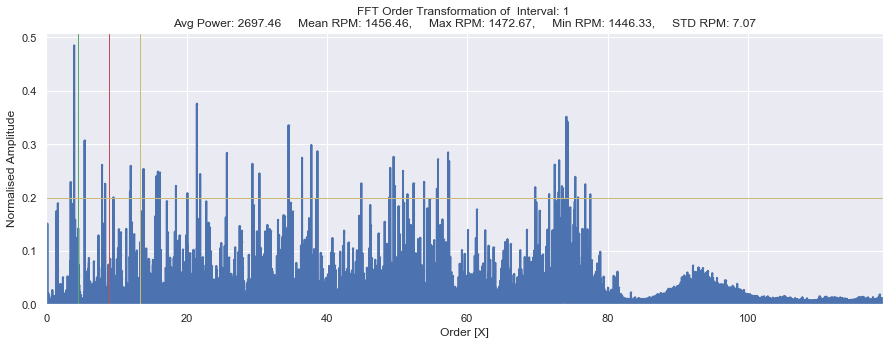

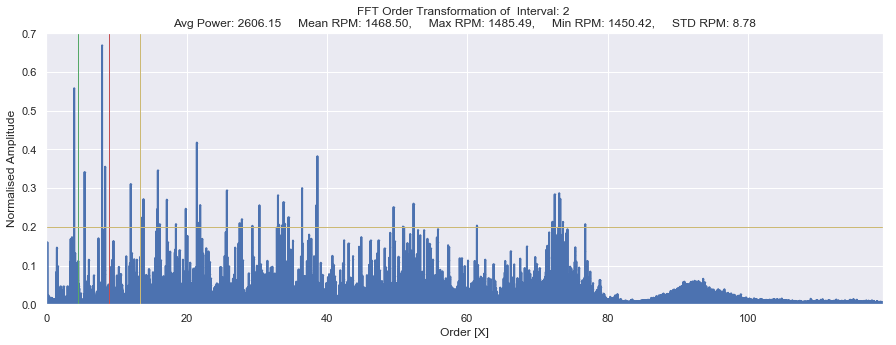

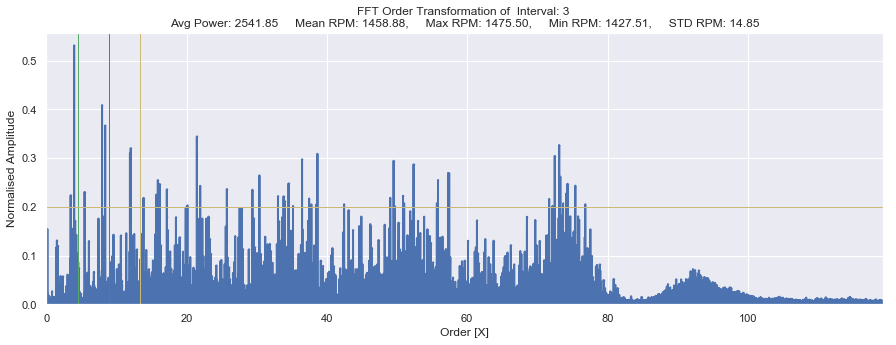

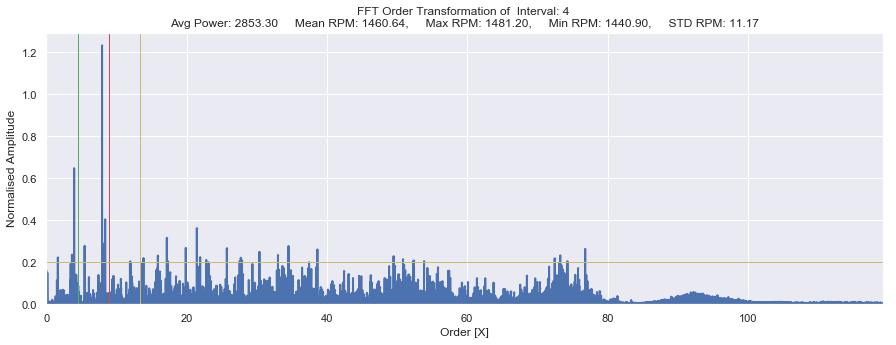

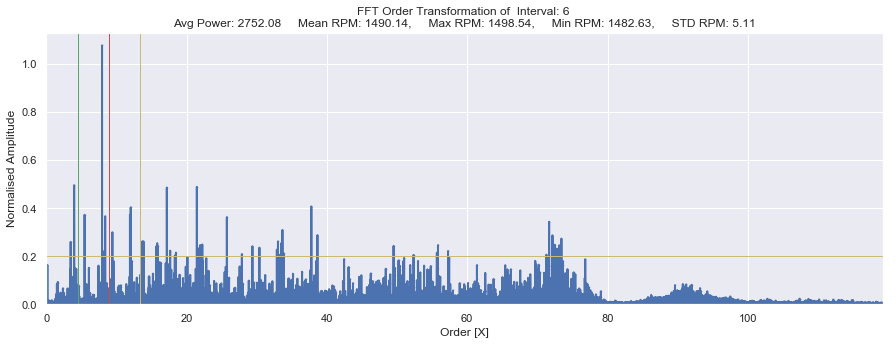

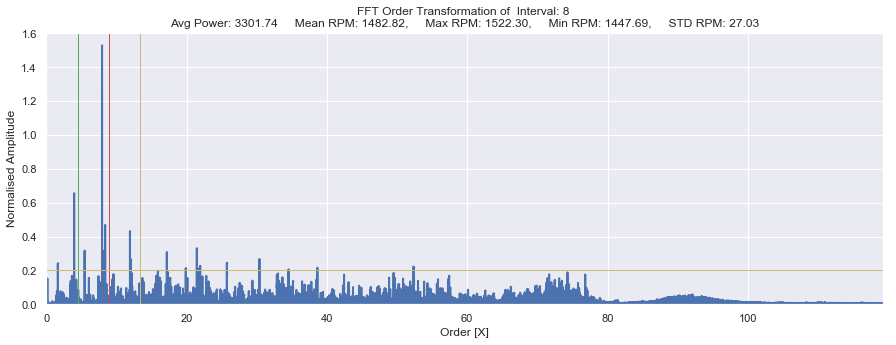

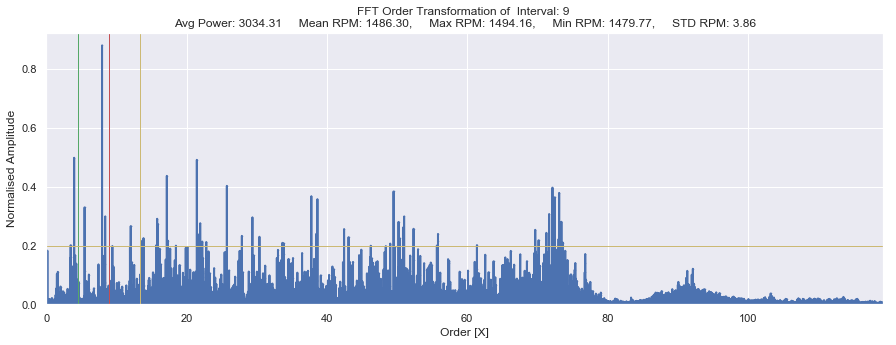

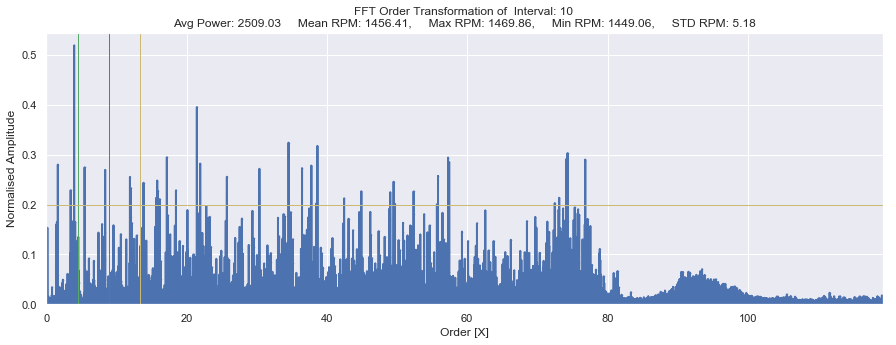

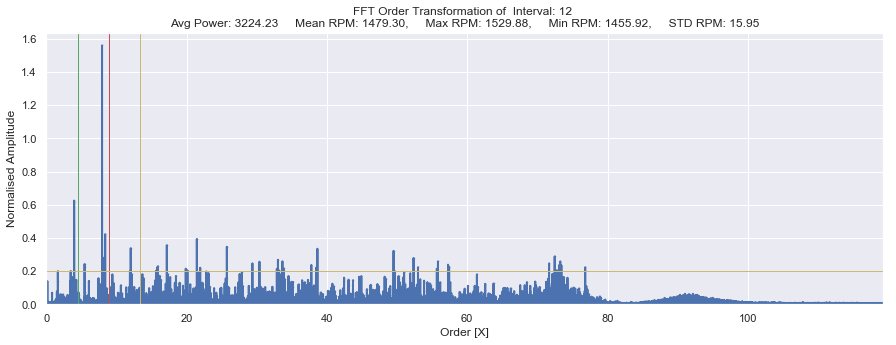

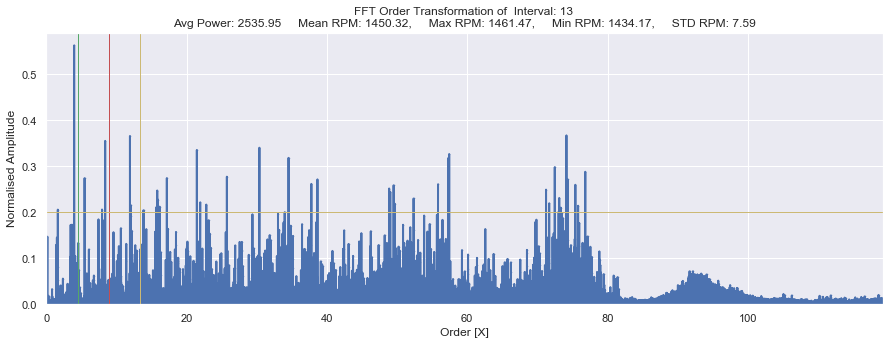

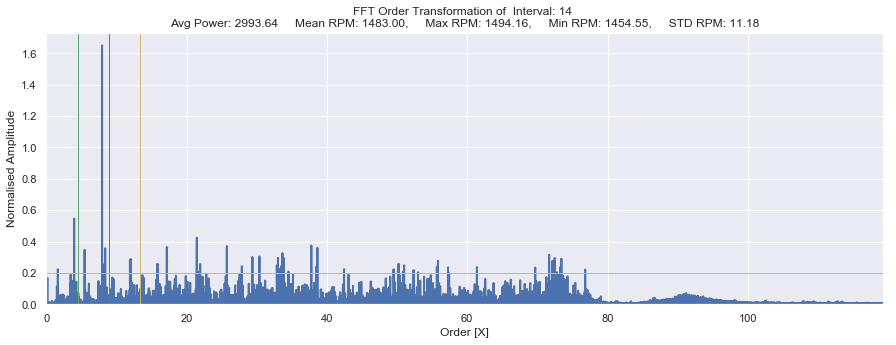

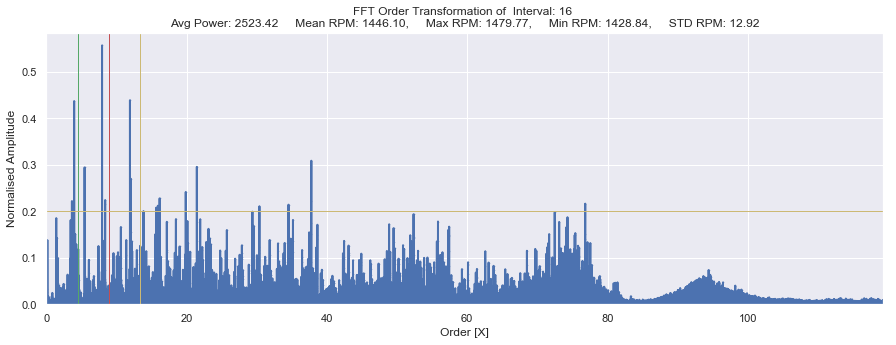

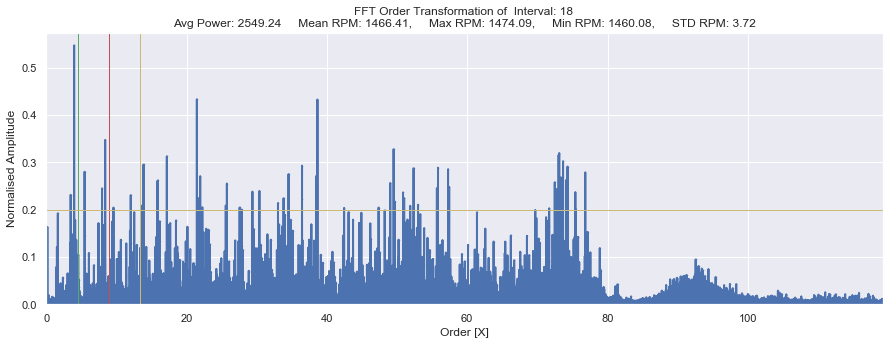

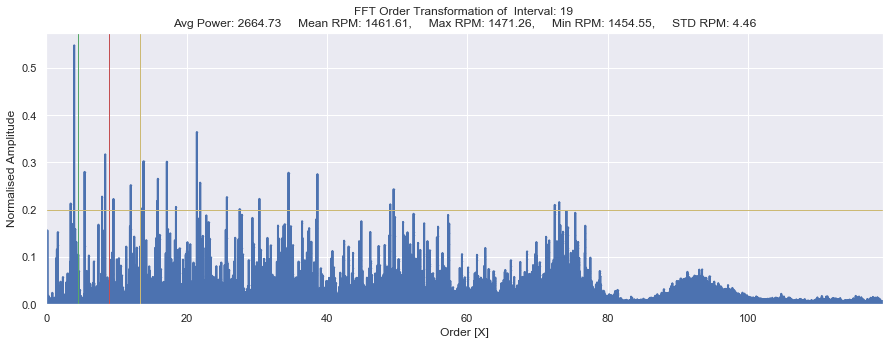

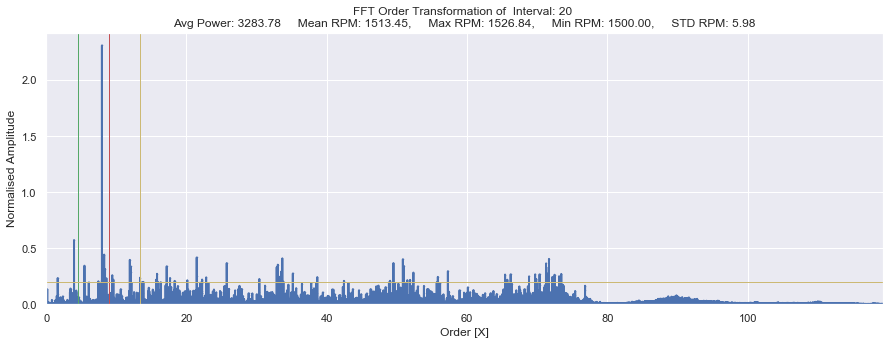

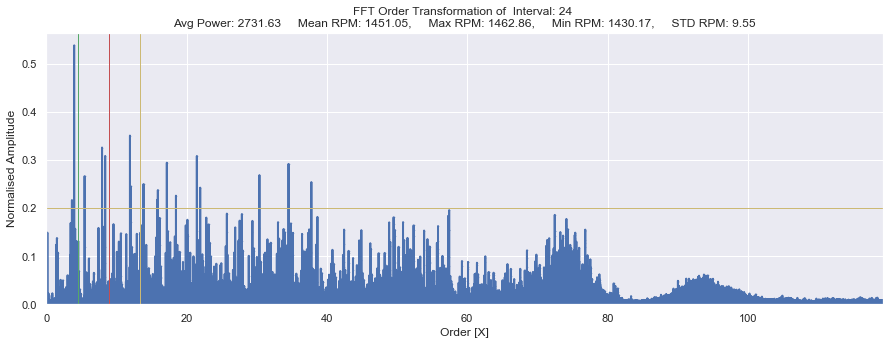

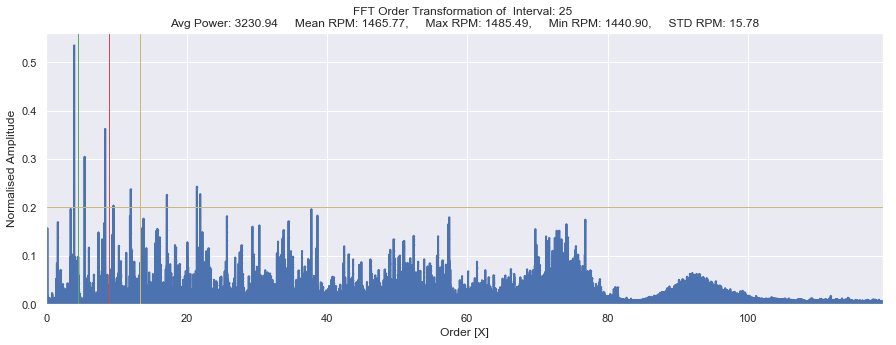

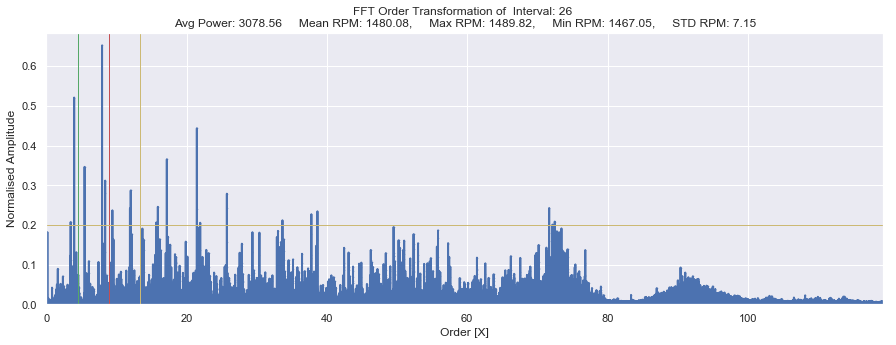

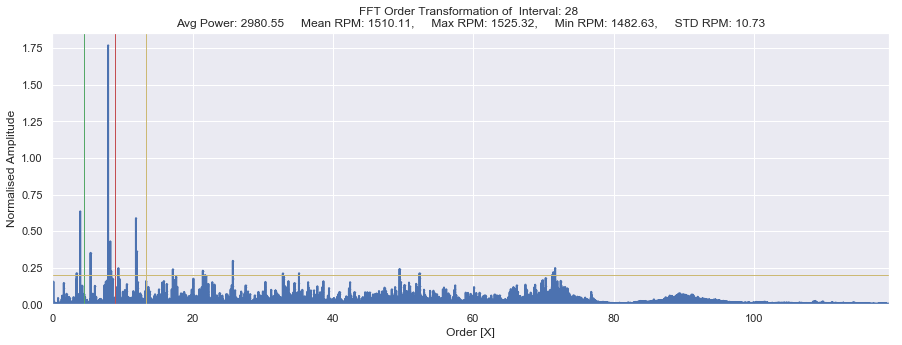

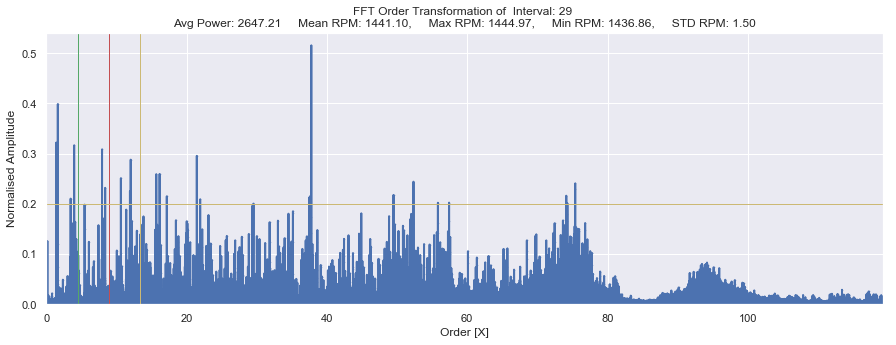

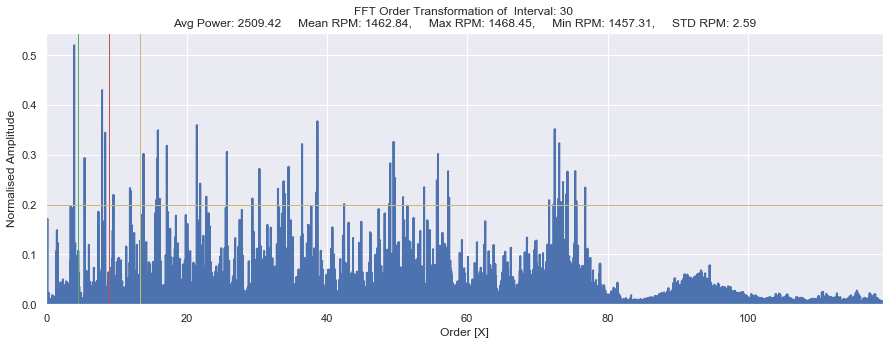

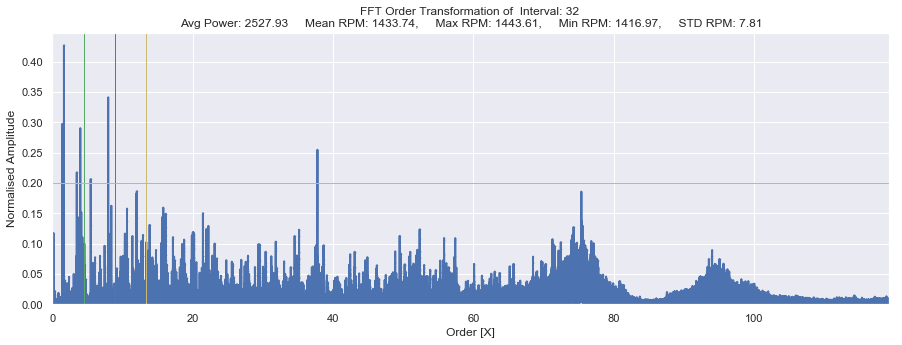

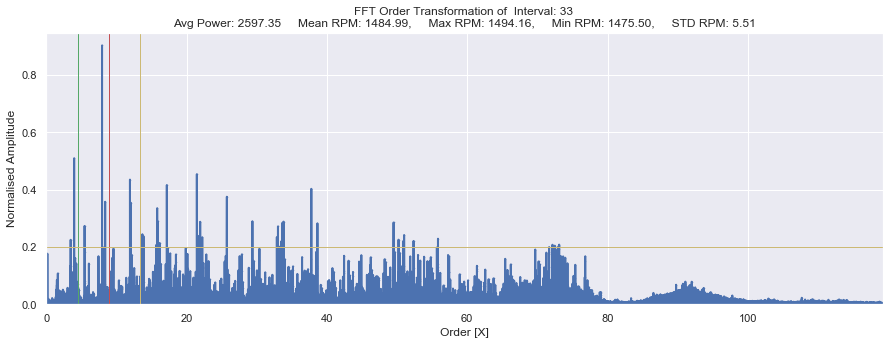

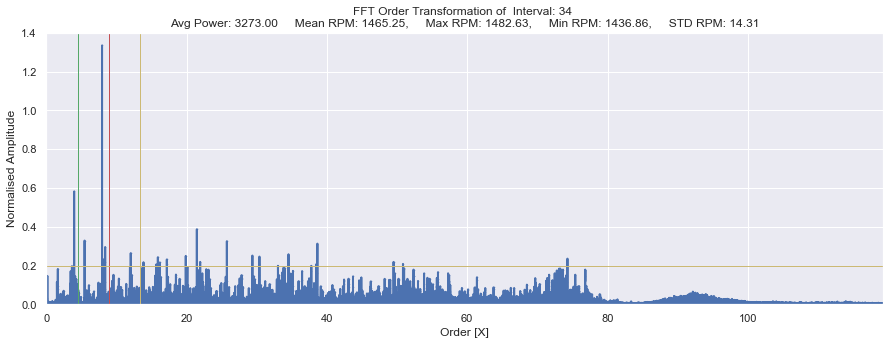

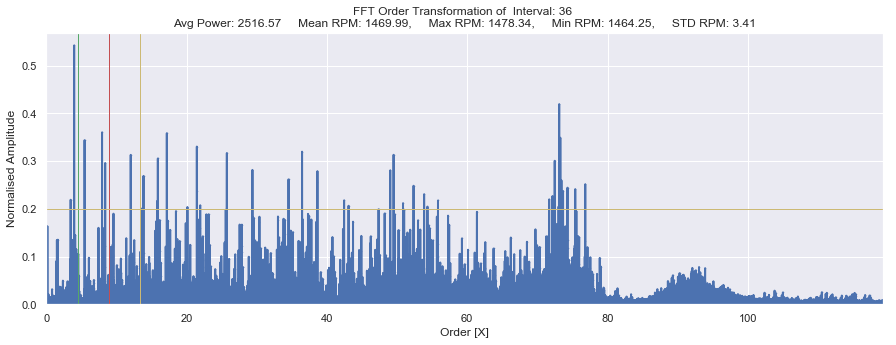

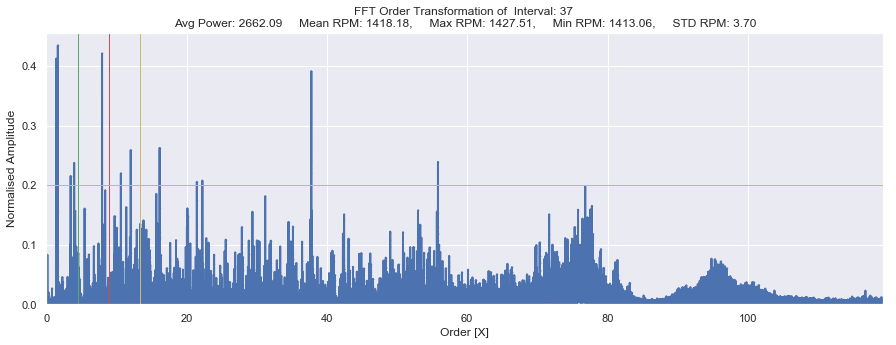

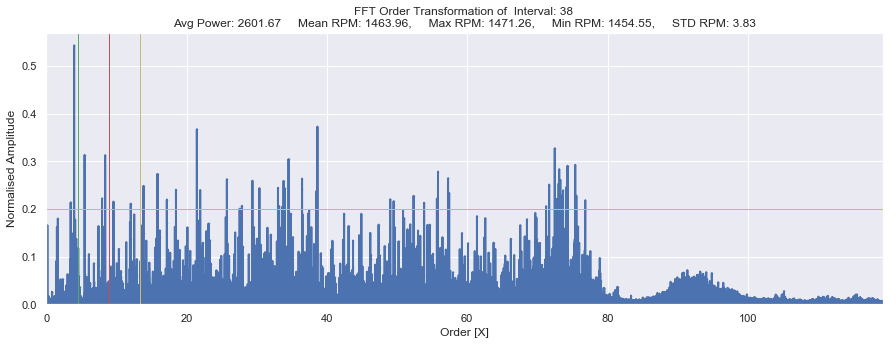

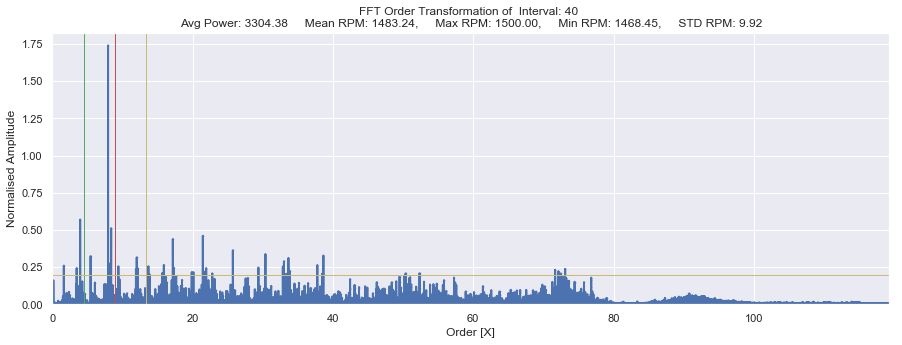

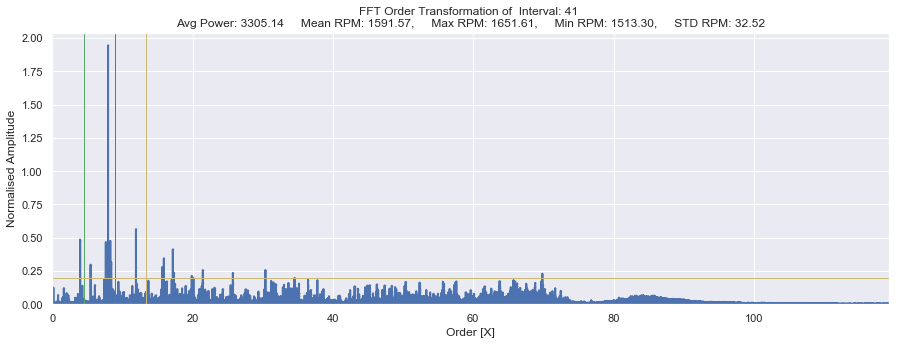

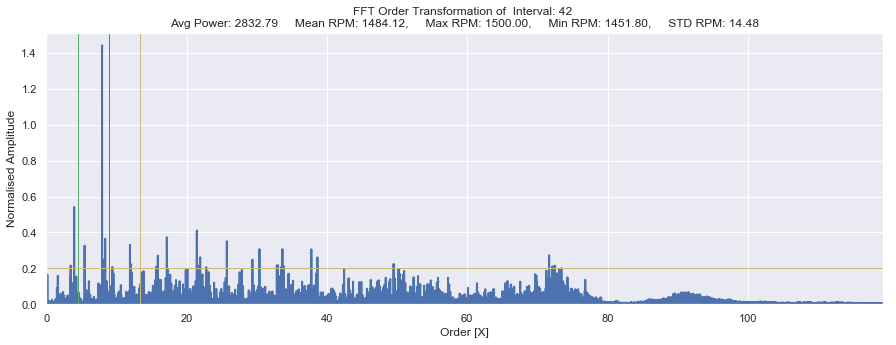

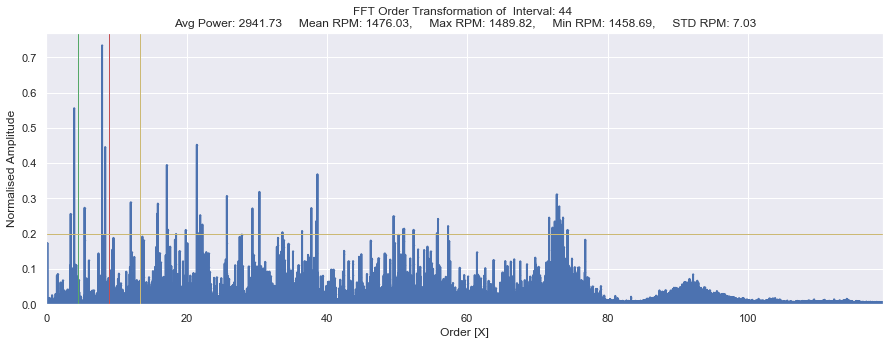

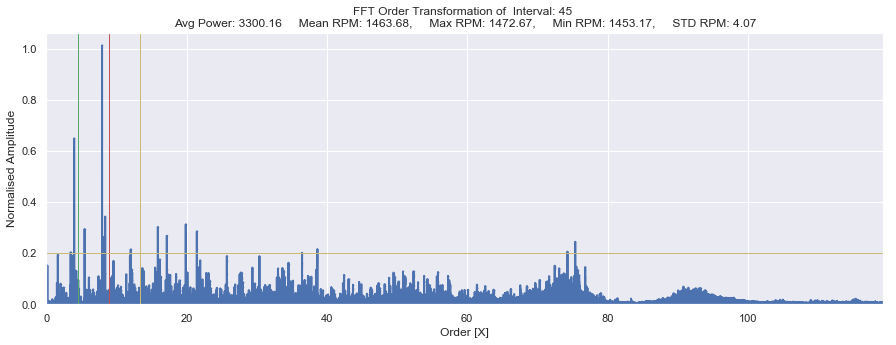

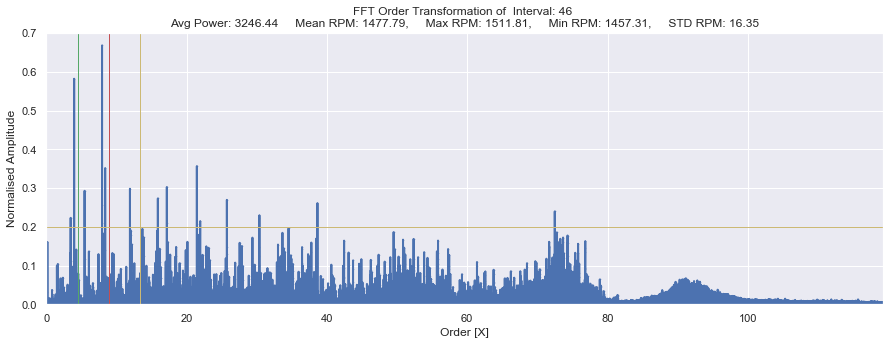

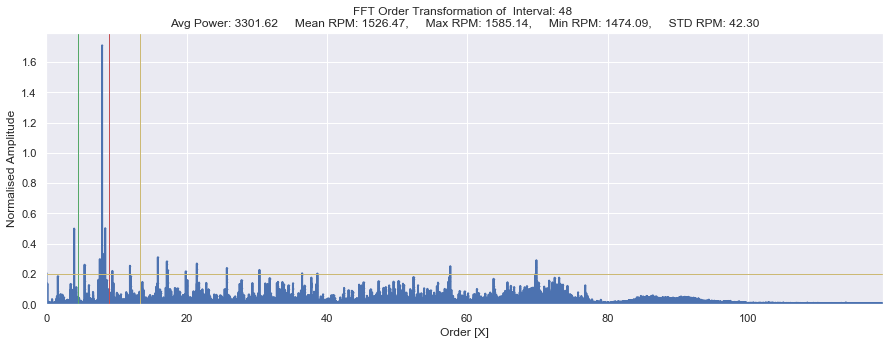

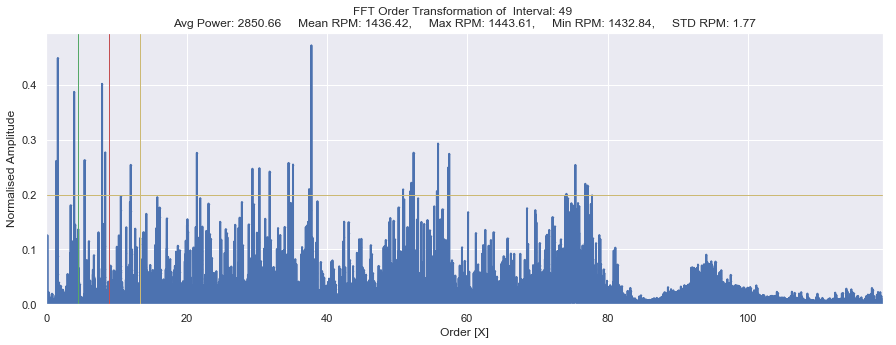

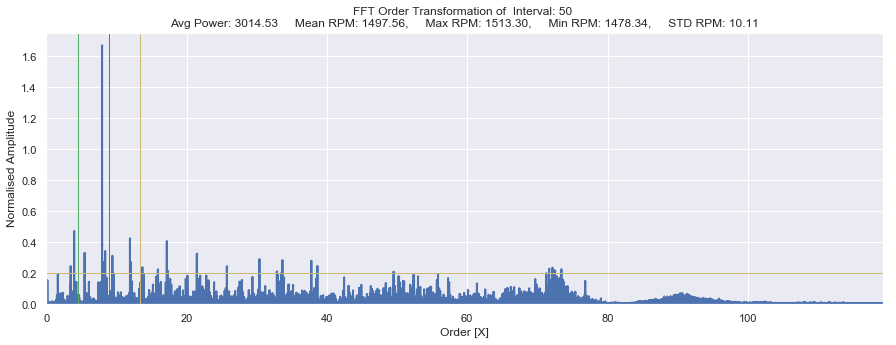

In [8]:
intervals = wt_instance.ten_second_intervals
sensor_name = 'GbxHssRr;0,0102;m/s2'
type = 'gearbox'
power_threshold = 2500

for i, interval in enumerate(intervals):
    if i > 50:
        break
    
    if (interval.sensor_df.shape[1]) == 14 and (interval.op_df["PwrAvg;kW"][0] > power_threshold):
        time_stamps = interval.sensor_df['TimeStamp']
        vibration_signal = interval.sensor_df[sensor_name]
        rot_data = interval.high_speed_rot_data
        peak_array = interval.high_speed_peak_array
        avg_power = interval.op_df["PwrAvg;kW"][0]

        time_resampled, y_resampled, all_time_resampled, all_y_resampled = resample.linear_interpolation_resampling(time_stamps,
                                                                                                          vibration_signal,
                                                                                                          peak_array, 1500,
                                                                                                          round_plots=3,
                                                                                                          plotting=False,
                                                                                                          name=sensor_name)


        fast = ff_transform.FastFourierTransform(all_y_resampled, all_time_resampled, type)
        fast.fft_transform_order(rot_data, avg_power, i, plot=True, x_lim=None)